In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Load the CSV file
df = pd.read_csv('drive/MyDrive/SMM/Aicopyright_responses_X.csv')

In [41]:
df.head()

,Comment,Date,Tag Used,Category,In favor of GenAI?,Stakeholder,Theme (not considered for analysis)
0,This is what baffles me. Artists by creation o...,Aug-12 2023,AIart infringement,Ownership,No,Artist,Copyright Infringement
1,"""Author George R.R. Martin is suing OpenAI for...",Sep-22 2023,#AIcopyright,Legal implication,No,Author,Copyright Infringement
2,"""It's their unlicensed use of copyrighted text...",Sep-15 2023,#AIcopyright,Economic Impact,No,General Public,Unauthorized training data
3,I'm pissed. This is a PARTIAL list of my books...,Sep-9 2023,#AIcopyright,Economic Impact,No,Author,Job displacement concerns
4,This. + we are not saying that an AI broke the...,Aug-8 2023,#AIcopyright,Ethical Concern,Neutral,Creator,Unauthorized training data


In [42]:
df['Comment'].duplicated().sum()

0

In [43]:
# Calculate percentages and count for each category
category_counts = df['Category'].value_counts(normalize=True) * 100
stakeholder_counts = df['Stakeholder'].value_counts(normalize=True) * 100
sentiment_counts = df['In favor of GenAI?'].value_counts(normalize=True) * 100

In [44]:
category_freq = df['Category'].value_counts()
stakeholder_freq = df['Stakeholder'].value_counts()
sentiment_freq = df['In favor of GenAI?'].value_counts()

In [45]:
print(category_counts)
print("----------------------------")
print(category_freq)
print("=================================")
print(stakeholder_counts)
print("----------------------------")
print(stakeholder_freq)
print("=================================")
print(sentiment_counts)
print("----------------------------")
print(sentiment_freq)

Category
Ethical Concern      42.0
Ownership            28.0
Economic Impact      16.0
Legal implication    14.0
Name: proportion, dtype: float64
----------------------------
Category
Ethical Concern      21
Ownership            14
Economic Impact       8
Legal implication     7
Name: count, dtype: int64
Stakeholder
Creator           30.0
Artist            26.0
General Public    22.0
Author            16.0
Legal analyst      6.0
Name: proportion, dtype: float64
----------------------------
Stakeholder
Creator           15
Artist            13
General Public    11
Author             8
Legal analyst      3
Name: count, dtype: int64
In favor of GenAI?
No         58.0
Neutral    22.0
Yes        20.0
Name: proportion, dtype: float64
----------------------------
In favor of GenAI?
No         29
Neutral    11
Yes        10
Name: count, dtype: int64


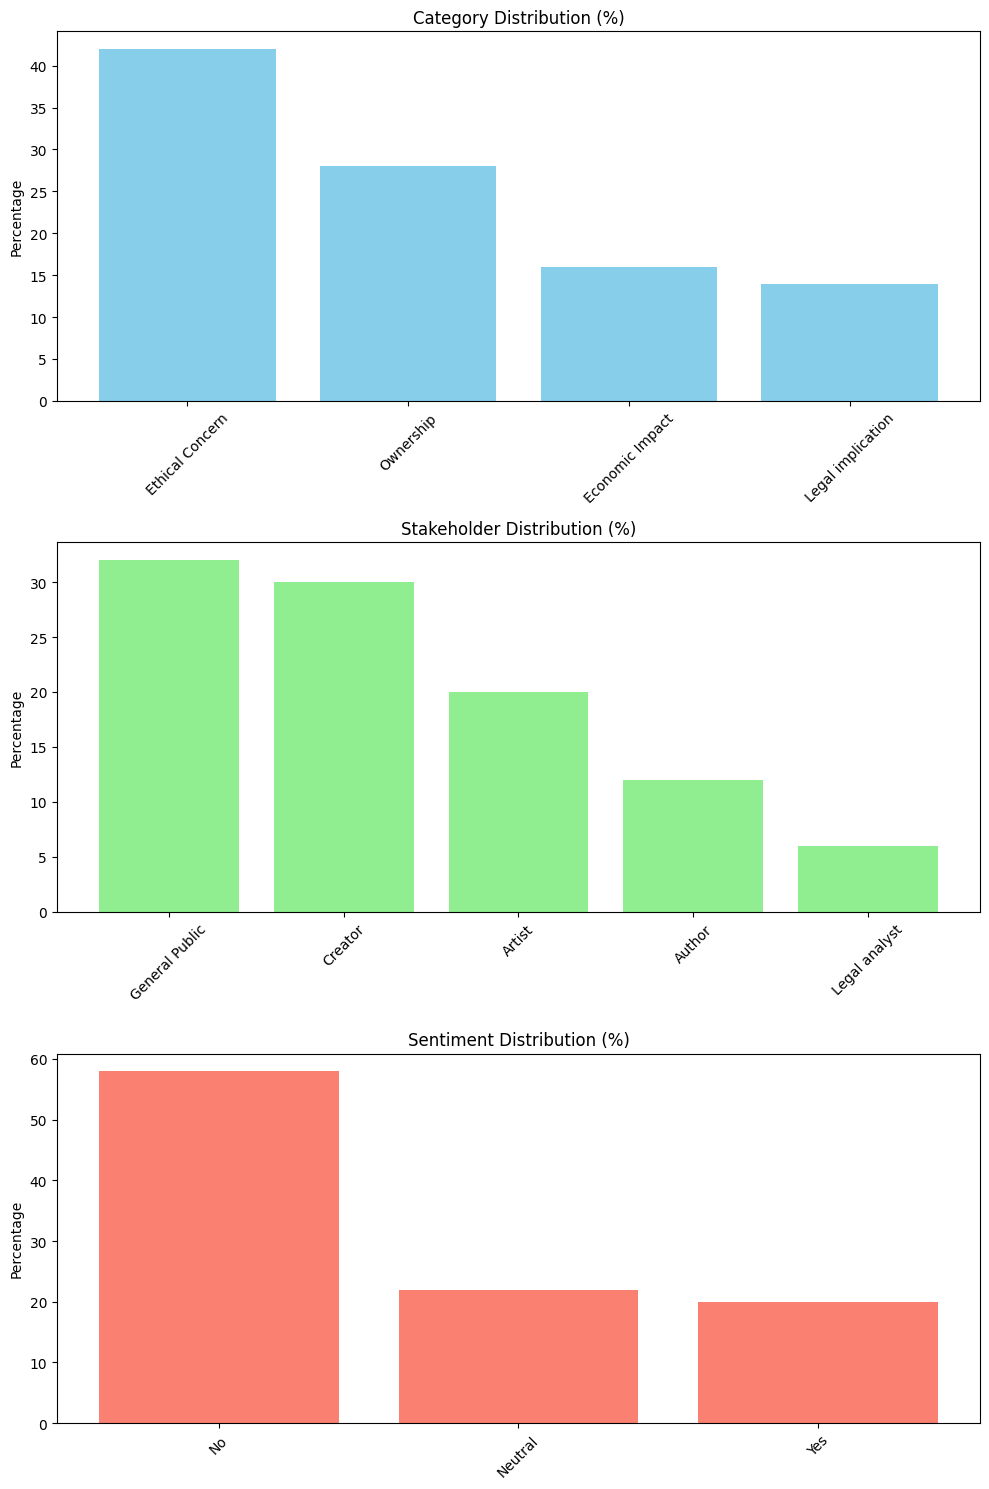

In [ ]:
# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Category Distribution
axes[0].bar(category_counts.index, category_counts.values, color='skyblue')
axes[0].set_title('Category Distribution (%)')
axes[0].set_ylabel('Percentage')
axes[0].tick_params(axis='x', rotation=45)

# Stakeholder Distribution
axes[1].bar(stakeholder_counts.index, stakeholder_counts.values, color='lightgreen')
axes[1].set_title('Stakeholder Distribution (%)')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)

# Sentiment Distribution
axes[2].bar(sentiment_counts.index, sentiment_counts.values, color='salmon')
axes[2].set_title('Sentiment Distribution (%)')
axes[2].set_ylabel('Percentage')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [46]:
#Comparitive analysis
# Filter data for those not in favor of AI
not_in_favor = df[df['In favor of GenAI?'] == 'No']

# Analyze the top category for those not in favor of AI
top_category_no_favor = not_in_favor['Category'].value_counts(normalize=True) * 100

# Analyze the top stakeholder for those not in favor of AI
top_stakeholder_no_favor = not_in_favor['Stakeholder'].value_counts(normalize=True) * 100

# Print results
print("Top Category for 'No' in Favor of GenAI:")
print(top_category_no_favor)
print("\nTop Stakeholder for 'No' in Favor of GenAI:")
print(top_stakeholder_no_favor)

# Additional insights: Compare sentiment across categories
category_sentiment_comparison = df.groupby(['Category', 'In favor of GenAI?']).size().unstack(fill_value=0)
category_sentiment_comparison_percentage = category_sentiment_comparison.div(category_sentiment_comparison.sum(axis=1), axis=0) * 100

print("\nCategory Sentiment Comparison (%):")
print(category_sentiment_comparison_percentage)

Top Category for 'No' in Favor of GenAI:
Category
Ethical Concern      48.275862
Economic Impact      24.137931
Ownership            20.689655
Legal implication     6.896552
Name: proportion, dtype: float64

Top Stakeholder for 'No' in Favor of GenAI:
Stakeholder
Creator           37.931034
Artist            27.586207
General Public    17.241379
Author            13.793103
Legal analyst      3.448276
Name: proportion, dtype: float64

Category Sentiment Comparison (%):
In favor of GenAI?    Neutral         No        Yes
Category                                           
Economic Impact      0.000000  87.500000  12.500000
Ethical Concern     23.809524  66.666667   9.523810
Legal implication   57.142857  28.571429  14.285714
Ownership           14.285714  42.857143  42.857143


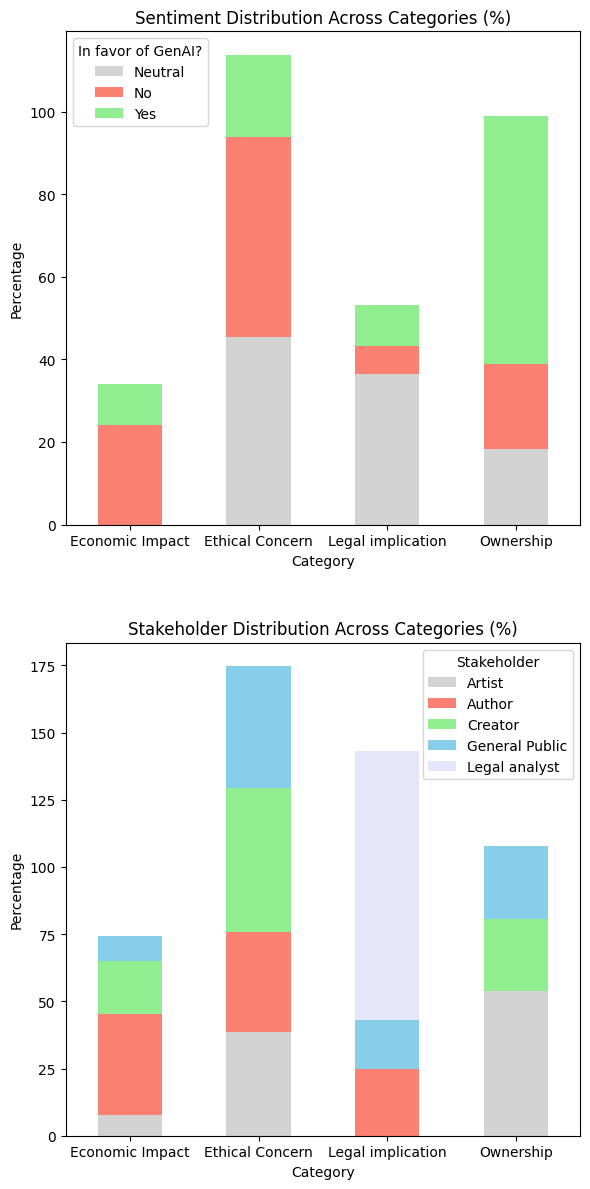

In [47]:
# Calculate sentiment distribution across categories
sentiment_category_comparison = df.groupby(['In favor of GenAI?', 'Category']).size().unstack(fill_value=0)
sentiment_category_comparison_percentage = sentiment_category_comparison.div(sentiment_category_comparison.sum(axis=1), axis=0) * 100

# Calculate stakeholder distribution across categories
stakeholder_category_comparison = df.groupby(['Stakeholder', 'Category']).size().unstack(fill_value=0)
stakeholder_category_comparison_percentage = stakeholder_category_comparison.div(stakeholder_category_comparison.sum(axis=1), axis=0) * 100

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(6, 12))

# Plot bar chart for sentiment vs category
sentiment_category_comparison_percentage.T.plot(kind='bar', stacked=True, ax=axs[0], color=['lightgrey', 'salmon', 'lightgreen'])
axs[0].set_title('Sentiment Distribution Across Categories (%)')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Category')
axs[0].tick_params(axis='x', rotation=360)
axs[0].legend(title='In favor of GenAI?')

#space between two plots
plt.subplots_adjust(hspace=10)
# Plot bar chart for stakeholder vs category
stakeholder_category_comparison_percentage.T.plot(kind='bar', stacked=True, ax=axs[1], color=['#D3D3D3', '#FA8072', '#90EE90', '#87CEEB', '#E6E6FA'])
axs[1].set_title('Stakeholder Distribution Across Categories (%)')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Category')
axs[1].legend(title='Stakeholder')

plt.xticks(rotation=360)
plt.tight_layout()
plt.savefig('combined_visualization.png')
plt.show()

In [ ]:
#get percentages of the above but not a graph
print(sentiment_category_comparison_percentage)

Category            Economic Impact  Ethical Concern  Legal implication  \
In favor of GenAI?                                                        
Neutral                    0.000000        45.454545          36.363636   
No                        24.137931        48.275862           6.896552   
Yes                       10.000000        20.000000          10.000000   

Category            Ownership  
In favor of GenAI?             
Neutral             18.181818  
No                  20.689655  
Yes                 60.000000  


In [ ]:
#comaprison of neutral comments with categories
neutral_comments = df[df['In favor of GenAI?'] == 'Neutral']
neutral_comments_category_counts = neutral_comments['Category'].value_counts(normalize=True) * 100
print(neutral_comments_category_counts)

Category
Ethical Concern      45.454545
Legal implication    36.363636
Ownership            18.181818
Name: proportion, dtype: float64


In [ ]:
# Filter for Legal Implication category
legal_implications = df[df['Category'] == 'Legal implication']

# Calculate sentiment distribution within Legal Implication
legal_sentiment_distribution = legal_implications['In favor of GenAI?'].value_counts(normalize=True) * 100

# Print results
print("Sentiment Distribution within Legal Implication (%):")
print(legal_sentiment_distribution)

Sentiment Distribution within Legal Implication (%):
In favor of GenAI?
Neutral    57.142857
No         28.571429
Yes        14.285714
Name: proportion, dtype: float64


In [ ]:
pip install squarify

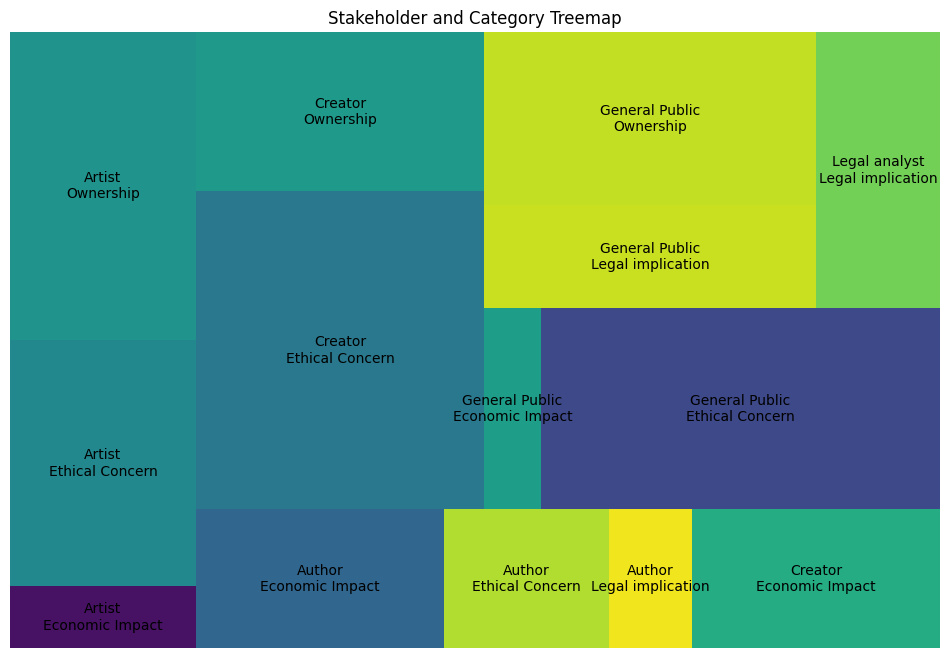

In [ ]:
import squarify

# Prepare data
stakeholder_category = df.groupby(['Stakeholder', 'Category']).size().reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=stakeholder_category['counts'], label=stakeholder_category.apply(lambda x: f"{x['Stakeholder']}\n{x['Category']}", axis=1))
plt.title('Stakeholder and Category Treemap')
plt.axis('off')
plt.show()

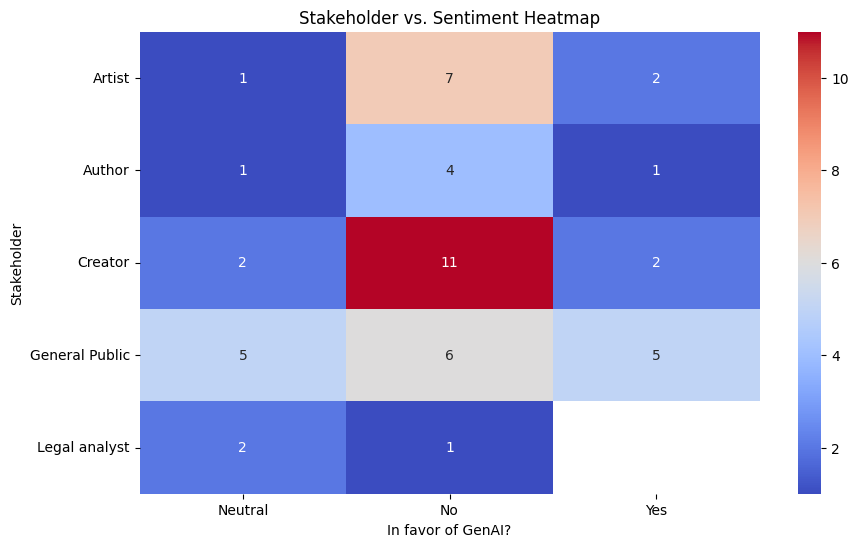

In [ ]:
import seaborn as sns

# Prepare data
stakeholder_sentiment = df.groupby(['Stakeholder', 'In favor of GenAI?']).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(stakeholder_sentiment, annot=True, cmap='coolwarm')
plt.title('Stakeholder vs. Sentiment Heatmap')
plt.xlabel('In favor of GenAI?')
plt.ylabel('Stakeholder')
plt.show()